In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [2]:
df = pd.read_csv("../../Base Dataloader/data/base/consolidated_products.csv")
df.head()

,stars,profile_name,profile_link,profile_image,title,date,style,verified,comment,voting,review_images,ASIN,cleaned_profile_link,cleaned_title,decoded_comment,cleaned_ratings,cleaned_verified,acc_num,cleaned_voting,cleaned_location,cleaned_date_posted,poly_obj,language,language_confidence,cleaned_text
0,5.0 out of 5 stars,Willow,/gp/profile/amzn1.account.AHR5T6MM2O3EPWKQS2TBOVXBXLQA,"https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/e783dd3d-310d-4d3c-83dc-8bcf600cf306._CR0,0,483,483_SX48_.jpg",Love love love,"Reviewed in the United States on December 11, 2019",Style Name: Rosy Tone MoisturizerSize: 1.7 Ounce,Verified Purchase,"Love, love, love this moisturizer! As a woman who has been blessed with many birthdays, I like to take care of my skin. I don’t mind a few “character lines”, but I like my skin soft and well-moisturized. This rosy glow moisturizer by L’Orèal goes a step further with a light floral scent and a rosy color to replace the rosy glow our skin seems to lose over time. I use it every day from my face to my neck, and even down to my collarbone. Really brings out a youthful glow. This is a staple in my skin care regimen!",One person found this helpful\n \n Helpful,0,B01M09QQI0,https://www.amazon.com/gp/profile/amzn1.account.AHR5T6MM2O3EPWKQS2TBOVXBXLQA,love love love,"love, love, love this moisturizer! as a woman who has been blessed with many birthdays, i like to take care of my skin. i dont mind a few character lines, but i like my skin soft and well-moisturized. this rosy glow moisturizer by loreal goes a step further with a light floral scent and a rosy color to replace the rosy glow our skin seems to lose over time. i use it every day from my face to my neck, and even down to my collarbone. really brings out a youthful glow. this is a staple in my skin care regimen!",1.0,1.0,AHR5T6MM2O3EPWKQS2TBOVXBXLQA,1,United States,"December 11, 2019",Prediction is reliable: True\nLanguage 1: name: English code: en confidence: 99.0 read bytes: 1019\nLanguage 2: name: un code: un confidence: 0.0 read bytes: 0\nLanguage 3: name: un code: un confidence: 0.0 read bytes: 0,English,99.0,love love love moisturizer woman ha bless many birthday like take care skin dont mind character line like skin soft rosy glow moisturizer loreal go step light floral scent rosy color replace rosy glow skin seem lose time use every day face neck even collarbone really bring youthful glow staple skin care regimen
1,5.0 out of 5 stars,Julie,/gp/profile/amzn1.account.AGNSFZ5L2RRLAZVJLP44FFZNOSJA,"https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png",Love it,"Reviewed in the United States on December 27, 2019",Style Name: Fragrance FreeSize: 1.7 Ounce,Verified Purchase,"This moisturizer works so well with my skin. Let me start by saying I am 37 years old and have fair sensitive skin that reacts negatively to most beauty products. Finding a moisturizer that works with my skin has been an expensive and disappointing process. So I ordered this, thinking it would be more of the same. But for me this moisturizer has been a miracle worker. The moisturizer noticeably smoothed and toned my skin. I saw a reduction in acne. The best part was that several years ago I had gotten a terrible sunburn on my forehead and the skin was still discolored. Guess what? The rosy tone moisturizer wiped it out in a week. Everyone’s skin is different and different products work differently for different people. But for me, rosy tone is perfect and I’m so happy I found it.",Helpful,0,B01M09QQI0,https://www.amazon.com/gp/profile/amzn1.account.AGNSFZ5L2RRLAZVJLP44FFZNOSJA,love it,"this moisturizer works so well with my skin. let me start by saying i am 37 years old and have fair sensitive skin that reacts negatively to most beauty products. finding a moisturizer that works with my skin has been an expensive and disappointing process. so i ordered this, thinking it would be more of the same. but for me this 

### Check distribution of review ratings
We can then find out how many reviews exist under the 1-star category, which we assume will mention the most amount of product defects

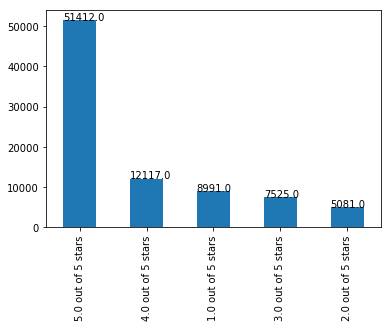

In [3]:
ax = df['stars'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height))

In [4]:
# Randomly observe what kind of "defects symptoms" might be present. This can guide our seed words later on
df[['title', 'comment']][(df['stars']=="1.0 out of 5 stars") | (df['stars']=="2.0 out of 5 stars")].sample(10)

,title,comment
59771,Not good!!,It has crums no matter how much i shake it and try to mix it is water and the cram is aweful
26774,Two Stars,Looks very cheap on
26506,One Star,I bought a consealer and the shades got mixed up horrible
3847,Like applying nothing,This is the worst mascara I’ve had. The brush is strange and doesn’t really touch your eyelashes. It goes in all directions. The actual mascara seems like your applying an invisible product. There is nothing there after application.
22786,Missing point,"Couldn't make it work, nothing inside to come up when I twisted it."
73012,The scent is just too much for me.,"I paid significantly more for this in a chain drug store ($18) and had high hopes for it. I only used it 2x but simply cannot get past the scent. It reminds me, personally, of the Garnier skin products which I also cannot tolerate the scent of. Yes, scent is personal and subjective, true enough, but if you don't like a strong, sticky, artificially sweet scent that lingers indefinitely, you may not like this. I prefer facial products to NOT have a scent (what's the purpose?), or to quickly fade to nothing after a few minutes. No one wants to smell the product all day, nor mix scents when they mix products on the face. I tried it on my arms hoping it to be more tolerable than the face, but it's all I could smell for hours. It simply does not fade. It's so strong I ended up washing it off an hour later. I cannot speak to the effectiveness after only two uses, but I can give it some positive: it dries ""dry"" not sticky, and before application is the consistency of a light serum. The dispenser is nice, but the scent is a no-go for me even though I really wanted o like it."
15004,and like there wasn't much in,"tube seemed very dry, dried out, and like there wasn't much in it"
16173,Dried out mascara,The mascara I received is dried out and barely even shows up. I have used this mascara many times and by far these are not up to or. Very disappointed.
3628,Worst product.,I wasted $8 forthis product. I applied it both on my bottom eyelid and upper eyelid line but it smudged within an hour and the area around my eyes were totally mess . It was looking as if U have dark circles . I wish i had kept the original packet to return this. Would not recomend to anyone.
73054,NaN,"I hardly had problem with skin care products, after 3days and nights, this one makes me itch and cause red rash all over my face. Don’t know what cause me has this allergy reaction. So I stop use this, that is waste,"


In [5]:
# Filter all reviews by 1/2 stars
df = df[(df['stars']=="1.0 out of 5 stars") | (df['stars']=="2.0 out of 5 stars")]

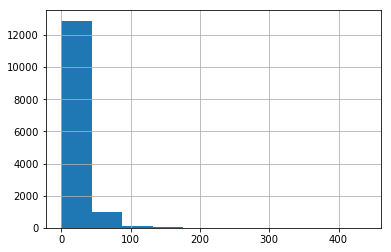

In [6]:
# Look at the distribution of words - Most of them falls below 200 words. We can explore using STTM
df['cleaned_text_word_count'] = df['cleaned_text'].fillna('').str.split().apply(len)
df['cleaned_text_word_count'].hist()

In [7]:
# Some short text topic modelling techniques assume that each document has 1 topic. 
# We look at reviews with high word count and found that they usually contain more than 1 topic. This was also the case
# with the lower word count reviews, and hence we cannot make this assumption so readily

df[['comment']][df['cleaned_text_word_count'] > 80]

,comment
654,"I'm on the sallow end of the scale, and always have been, even as a child. It has nothing to do with ""dead cells,"" as the blurb would have you believe. I exfoliate religiously and there are no dead cells on my skin, but I""m still pale and yellowish. So I decided to try this to perk up my coloration a bit, because I'm afraid that if I fall asleep, my grands will think I'm dead and bury me.First of all, this is not an easy product to find. I went to five places before I found it.My experience:This is the first item I've bought in years that comes in a jar instead of a pumper bottle or tube. So the first time my clean finger touched it, it was contaminated. I use a coffee stirrer to scoop it out of the jar. Don't buy products that come in jars!It's quite thick and stiff, so before applying, I rub my hands together for a few seconds to warm it up and hopefully make it more spreadable. Doesn't work. So I'm rubbing and pulling on my skin while applying. Major no-no.Despite being so thick, it's not emollient enough for me. So I'm doing a double application: apply it, wait five minutes for it to absorb, and reapply.It's fragranced. Booooo.It does't impart much color. And that's what I bought it for.The price is right, compared to other toiletries, but ultimately, it's not worth it and I won't buy it again. I don't hate it, and it's not ruining my skin, but... no thanks.The only reason I'm not pitching it out is that I'm too cheap. So I'll use it up and that'll be it for this product."
939,"I compared two rose tinted skin creams, putting them each on one half of my face for a about two weeks.1. Neutrogena Bright Boost Gel Cream, Brightening Face Moisturizer: https://www.amazon.ca/gp/product/B081DJ199F2. L'Oreal Paris Face Moisturizer Age Perfect Renewal Tinted Rosy Tone Day Cream:https://www.amazon.ca/gp/product/B01M09QQI0Note: I do not expect to see cumulative results so I am providing this review after only two weeks. If I see any improvement from ongoing use of either product, I'll update this review.I don't buy into the face cream hype, so my expectations were low: simply that the cream would make my face look a bit pink, would make my face feel moisturized, and that it would have a pleasant scent.I think of these rosy creams as more of a cosmetic than a skin boosting cream – something that will make a visible difference in the moment and wash off after, without any long-term impact. However, neither creates a lasting or even temporary change in skin tone tone (I'm fair and it would definitely show). The Neutrogena feels like a base to put makeup over because it seems to create a smooth surface. My face didn't feel any more moisturized after use but I like how it feels a bit tight and dry to the touch. The L’Oreal feels a bit oily throughout the day.The L'Oreal has a mild scent that smells a bit like an old lady. The Neutrogena has a mild, slightly floral scent.The L’Oreal goes on fairly thick and and absorbs into the skin faster than the Neutrogena. It has a matte tone to it and although other reviewers comment on sparkles, I didn’t see any in my 10X magnifying mirror. The Neutrogena feels nice on the skin and has a pearly iridescence. It's a bit on the runny side (I don’t know why it’s called a “gel”). There are tiny sparkle flecks (you can see them in a 10x magnifying mirror) which may help with the claim for ""brightness"".Overall, my skin seems a bit smoother than on the side that I used Neutrogena on. It’s not enough to say there’s a noticeable difference between the two products.The Neutrogena marketing claims the cream boosts cell turnover by 10 times - but how do you even know that? The L'Oreal marketing language is less extreme and more believable.The results are subjective, but I think my skin looks marginally brighter on the Neutrogena half of my face and it goes on light. Overall, I preferred the Neutrogena to the L'Oreal product."
1555,"UPDATE: I'm dropping this down to 2 stars now that I've had it fo

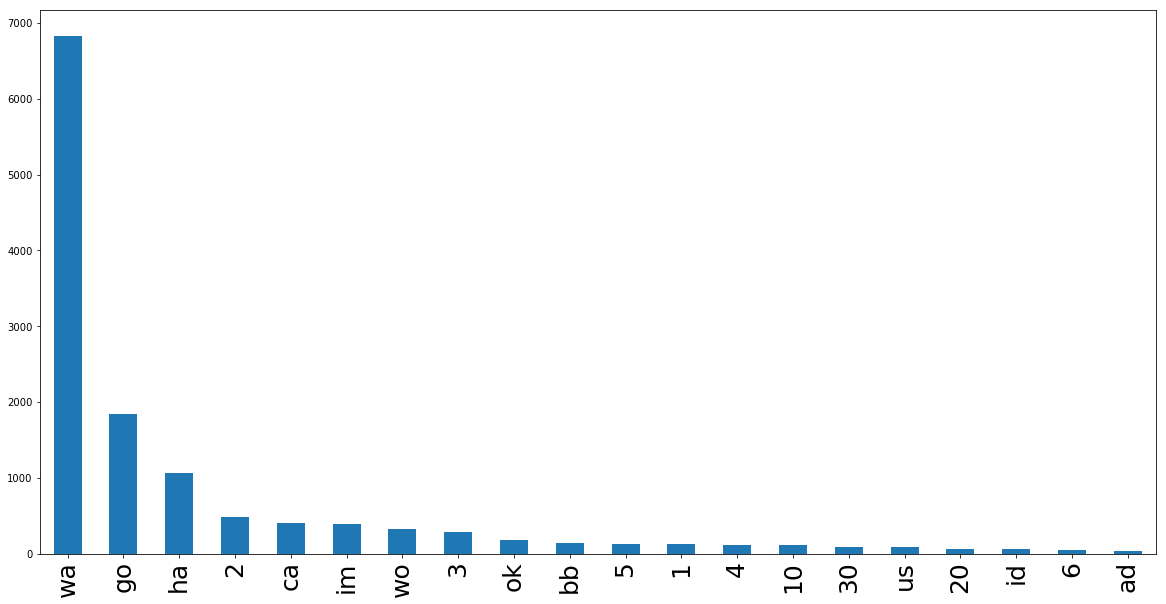

In [8]:
# We also need to remove any words lesser than word count 2
# Look at the words with 2 characters and less - does not give much meaning so we can remove it.
short_words = [word for word in df['cleaned_text'].str.cat(sep=' ').split() if len(word) <= 2]
ax = pd.Series(short_words).value_counts()[:20].plot(kind='bar', figsize=(20,10))
ax.tick_params(axis='x', which='both', labelsize=25)

In [9]:
# Explore what the numbers stand for - since they do not add much value we will remove all numbers
df[['comment']][df['cleaned_text'].fillna('').str.contains('5')].head(5)

,comment
21,"Read the ingredients!I made the mistake of NOT doing so.Weird smelling and made my skin feel sunburned. I don't have sensitive skin, age 59...not taking any chances soI will not be using it anymore."
75,Not impressed with how it moisturizes. Doesn't tint the skin like I was hoping it would so I wouldn't have to wear foundation. Made me break out and I'm 58 years old and don't normally break out.
187,"I gave this product 1 ☆, because they don't mention that this product is only for fare skinned women. If yours skin is brown or darker, this product is not for you. Can't see the rosy color at all. I'm 45 and I was hoping for some rosy natural color. I don't wear makeup or blushes. Disappointed!"
205,Saw no difference in my skin. Fragrance too strong. Product should be unscented. Pink color comes off on clothing. Would not buy again. I am a young 65 plus.
675,"Why does L'Oreal assume that women of a ""certain age"" (57 in my case) like to have artificial, chemical scents in the facial skin products? I had to throw it out before I had enough time to see if it worked as claimed. Pity (and insulting, too)."


In [28]:
# We're looking for defect symptoms - words and phrases like "clumpy", "dried out when received", or "lid broken"
# Hence, we can filter the words by adjectives, nouns and verbs.

def filter_pos_tags(text, tag_lst):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    
    filtered_sent = [word for word, tag in tags if tag[0] in tag_lst]
    return ' '.join(filtered_sent)
        

import nltk
import numpy as np

In [64]:
# Look at top rated reviews - We can use these + filter out N,V,Js to extract the keywords for seeding our topic models.
# Assumption here is that the higher voted the issues, the more prevalant it is and representative of the underlying dataset (to some extent)
# Because ppl upvote means they are facing the same issue, and hence similar issues worded differently will exist too 

def replace_null(col, replace_text):
    col = col.copy()
    return col.fillna(replace_text)


def remove_short_words(col, length):
    col = col.copy()
    t = col.str.split(expand=True).stack()
    return t.loc[t.str.len() >= length].groupby(level=0).apply(' '.join)


def remove_digits(col):
    col = col.copy()
    return col.str.replace('\d+', '')


df['cleaned_text'] = remove_digits(df['cleaned_text'])
df['cleaned_text'] = remove_short_words(df['cleaned_text'], 3)
df['cleaned_text'] = replace_null(df['cleaned_text'], np.nan)
top_rated_df = df[['comment','cleaned_text','cleaned_voting', 'ASIN']].sort_values(by='cleaned_voting', ascending=False)
top_rated_df['cleaned_text'] = top_rated_df['cleaned_text'].str.strip().drop_duplicates()
top_rated_df['extracted_text'] = top_rated_df['cleaned_text'].astype(str).apply(filter_pos_tags, tag_lst=['N', 'V', 'J'])
top_rated_df.dropna(inplace=True)

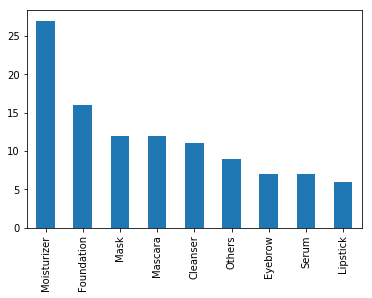

In [65]:
# Visualize distribution of product categories

prod_cat_df = pd.read_csv("../data/uc3/labels_generator/product_categories.csv")
prod_cat_df['Type'].value_counts().plot(kind='bar')

In [67]:
# Get the top 5 from each product category
merged_df = pd.merge(top_rated_df,prod_cat_df,on='ASIN', how='left')
g = merged_df.groupby(["Type"]).apply(lambda x: x.sort_values(["cleaned_voting"], ascending=False)).reset_index(drop=True)
g.groupby('Type').head(5)


,comment,cleaned_text,cleaned_voting,ASIN,extracted_text,Type
0,"is this a good micellar cleansing water ... yes. However I will not buy again as I discovered that Garnier tests on animals :(Just bought Boots micellar which is comparable, less expensive and does NOT test on animals.",good micelar cleanse water yes however buy discover garnier test animal buy boot micelar comparable less expensive doe test animal,446,B017PCGABI,good micelar cleanse water buy garnier test animal buy micelar comparable expensive doe test animal,Cleanser
1,"DO NOT BUY.This is why I have to stick to shopping from the store. This is a fake product. I used it without paying attention to the detail of the bottle, and later I instantly knew it was not the real product from the smell. The second thing I noticed was when I use the original Garnier Skin Active Micellar water my skin feels kinda tingly and I did not get that effect from the Amazon “Garnier Micellar water.”The amazon, the bottle is bigger, the text on the logo is different, the back is completely different, and the consistency is more soapy than the original one.Save your time and money and just go to the store and buy it.",stick shop store fake product use without pay attention detail bottle later instantly know real product smell second thing notice use original garnier skin active micelar water skin feel tingly get effect amazon garnier micelar amazon bottle big text logo different back completely different consistency soapy original time money store buy,234,B017PCGABI,stick shop store fake product use pay attention detail bottle know real product smell second thing notice use original garnier active micelar water skin feel get effect amazon garnier micelar amazon bottle big text logo different different consistency soapy original time money store buy,Cleanser
2,"There was no safety seal on the product. I have purchased the same product in stores and it has a safety seal. I am not comfortable using it because of this. I don't know if it has been tampered with or if it is just plain fake. Without a factory seal, it is useless. Waste of money as I will not be using it.",safety seal product purchase product store safety seal comfortable use know tamper plain fake without factory seal useless waste money use,138,B017PCGABI,safety seal product purchase product store safety seal comfortable use know tamper plain fake factory seal useless waste money use,Cleanser
3,"Gave me the worst breakout I have EVER had in my life! I used the Garnier Micellar Cleansing Water to wash my face one night, and when I woke up the next morning.....There were these little bumps “and” little white pimples EVERYWHERE—All Over My Face & Even on Some Areas of My Neck!Terrible product for something advertised as being non-comedogenic and “safe enough to use day and night.” Also, the bottles even says “no need to rinse.”I don’t know WHO this product was tested on, but obviously not anyone with sensitive skin and/or prone to breakouts!If they had, they would CLEARLY SEE that this product is NOT for “everyone” as we are led to believe by the product’s labeling! Complete waste of money! I do NOT recommend it!I really wish I could have given this product a better review because I was excited about using it, and had high hopes for the product!Considering it initially appeared (and was advertised) as an alternative to the usual (ingredients by the dozens) facial cleansing products, I thought I found something great!Unfortunately, my initial opinions/observations of this product were completely wrong, and to hopefully save others the same disaster, I am sharing my experience in using this product.My review is “NEGATIVE” considering I ended up with the WORST Breakout of My Life (no exaggeration whatsoever) that (HONESTLY) took about 2 1/2 weeks to calm down!I actually STILL have a few lingering areas that I’m trying to get the blemishes to heal (and disappear) after using the product just ONCE!Be careful with this product if yo